# Scaler Pca Study

This notebook will look at what scaler can bring to PCA transformed data

**Main goals are**: 
- Represent the impact of scaler on first 3 PCAs


In [1]:
from local_lib.dataset import retreiveDatasetFromCsv
from local_lib.flatten_transformer import FlattenTransformer
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.model_selection import train_test_split
from local_lib.non_zero_transformer import NonZeroTransformer
from local_lib.mask_transformer import MaskSeuilTransformer
from local_lib.flatten_transformer import FlattenTransformer
from local_lib.dimension_transformer import DimensionTransformer
import numpy as np
from sklearn.decomposition import PCA

dataset = retreiveDatasetFromCsv()
dataset = dataset.sample(frac=1, random_state=42)

pipeline = Pipeline([
    ('flatten_tr', FlattenTransformer()),
    ('non_zero_tr', NonZeroTransformer()),
    ('mask_tr', MaskSeuilTransformer(strategy="combined")),
    ('dimension_tr', DimensionTransformer())])

In [2]:
# Fit and transform data
X = pipeline.fit_transform(dataset["pixel_value"])
y = np.array(list(dataset["class"]))

pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.33, random_state=0)

In [4]:
import numpy as np
y_train = y_train.reshape(1, -1)
y_test = y_test.reshape(1, -1)
X_train = X_train.T
X_test = X_test.T

y_train_pca = y_train_pca.reshape(1, -1)
y_test_pca = y_test_pca.reshape(1, -1)
X_train_pca = X_train_pca.T
X_test_pca = X_test_pca.T

In [5]:
import copy

# Make a copy of the list
y_train_simpler = copy.deepcopy(y_train)
y_train_simpler[y_train_simpler == 2] = 1

y_test_simpler = copy.deepcopy(y_test)
y_test_simpler[y_test_simpler == 2] = 1

print(np.unique(y_train_simpler))
print(np.unique(y_test_simpler))

[0 1]
[0 1]


In [6]:
import numpy as np

# Création de la matrice identité
identity_matrix = np.eye(3)
identity_matrix_simpler = np.eye(2)

# Transformation de t1 en t2
y_train_reshaped = identity_matrix[y_train[0]].T
y_test_reshaped = identity_matrix[y_test[0]].T

y_train_simpler_reshaped = identity_matrix_simpler[y_train_simpler[0]].T
y_test_simpler_reshaped = identity_matrix_simpler[y_test_simpler[0]].T

print(y_train_reshaped.shape)
print(y_test_simpler_reshaped.shape)

(3, 3923)
(2, 1933)


## **Raw data on first 3 PCAs**

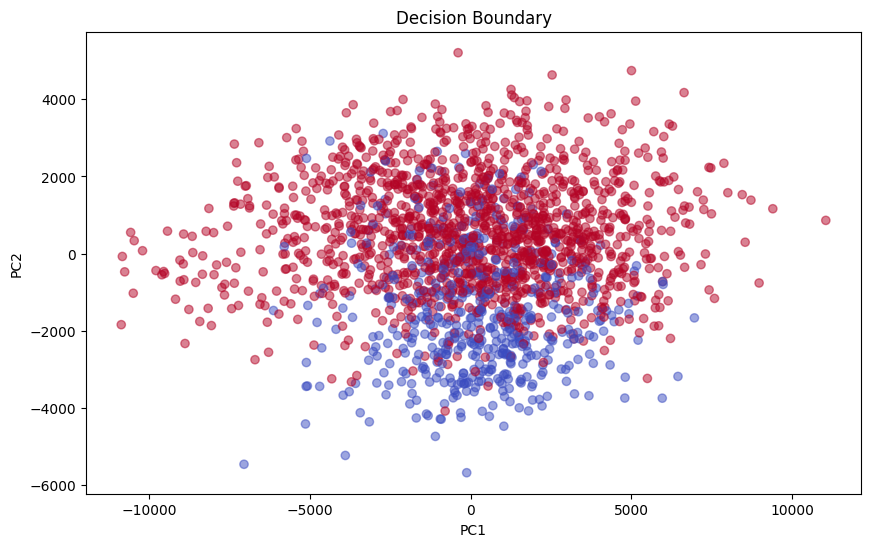

In [7]:
from local_lib.plotting import plotClassesAlong2PCa

pc_1 = X_test_pca[0, :]
pc_2 = X_test_pca[1, :]
y_test_simpler[0]

plotClassesAlong2PCa(pc_1, pc_2, y_test_simpler[0])

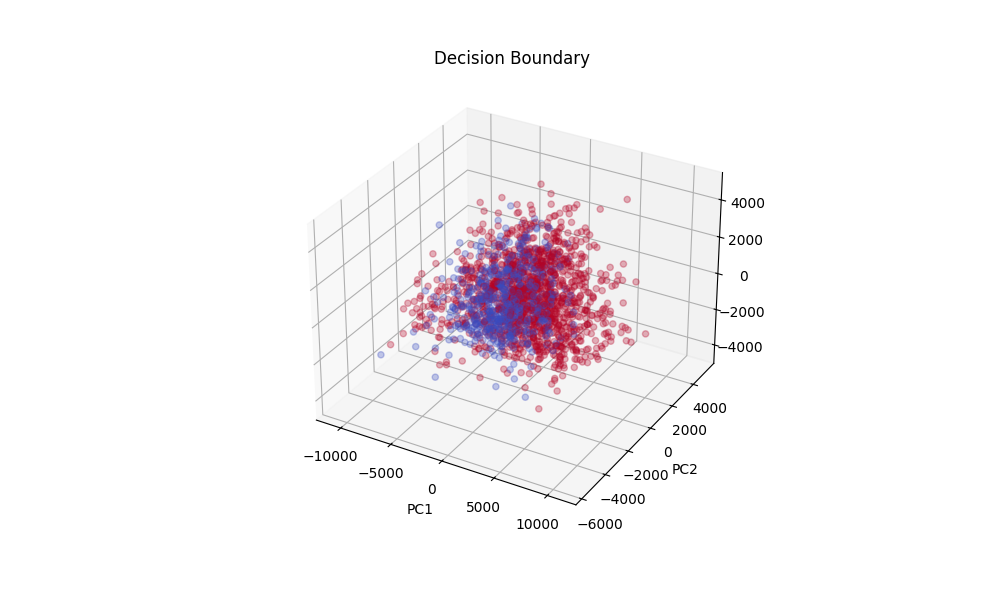

In [8]:
%matplotlib widget
from local_lib.plotting import plotClassesAlong3PCa
pc_1 = X_test_pca[0, :]
pc_2 = X_test_pca[1, :]
pc_3 = X_test_pca[2, :]
plotClassesAlong3PCa(pc_1, pc_2,pc_3, y_test_simpler[0])

## **Looking at what scaler does to our data**
### **Minmax Scaler**

In [9]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MinMaxScaler

pipeline = Pipeline([
    ('minmax', MinMaxScaler())])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.fit_transform(X_test)
X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)

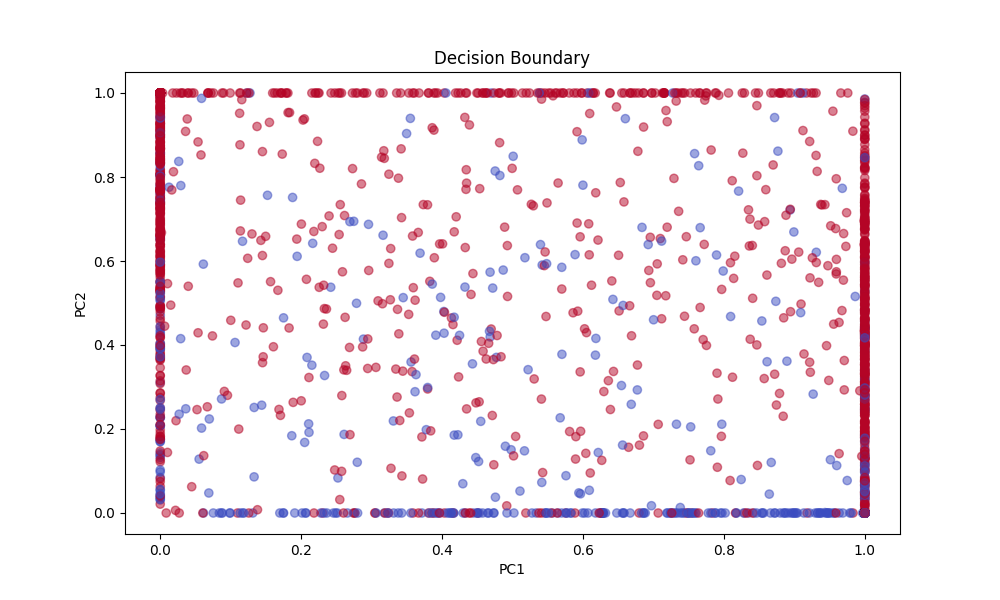

In [10]:
from local_lib.plotting import plotClassesAlong2PCa

pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
y_test_simpler[0]

plotClassesAlong2PCa(pc_1, pc_2, y_test_simpler[0])

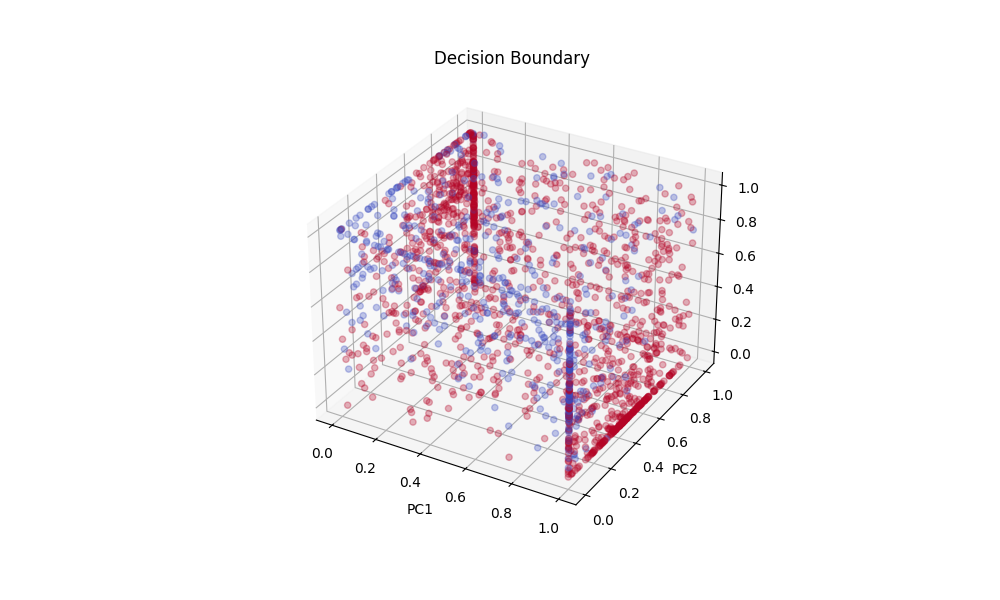

In [11]:
%matplotlib widget
from local_lib.plotting import plotClassesAlong3PCa
pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
pc_3 = X_test_pca_scaled[2, :]
plotClassesAlong3PCa(pc_1, pc_2,pc_3, y_test_simpler[0])

## **Normilazer**

In [12]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import Normalizer

pipeline = Pipeline([
    ('normalize', Normalizer())])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.fit_transform(X_test)
X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)

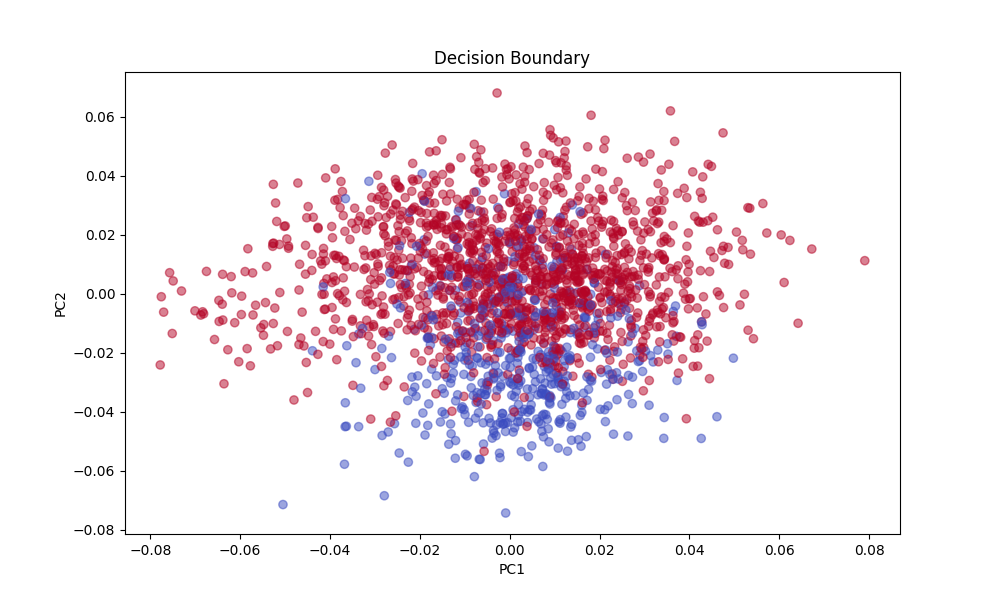

In [13]:
from local_lib.plotting import plotClassesAlong2PCa

pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
y_test_simpler[0]

plotClassesAlong2PCa(pc_1, pc_2, y_test_simpler[0])

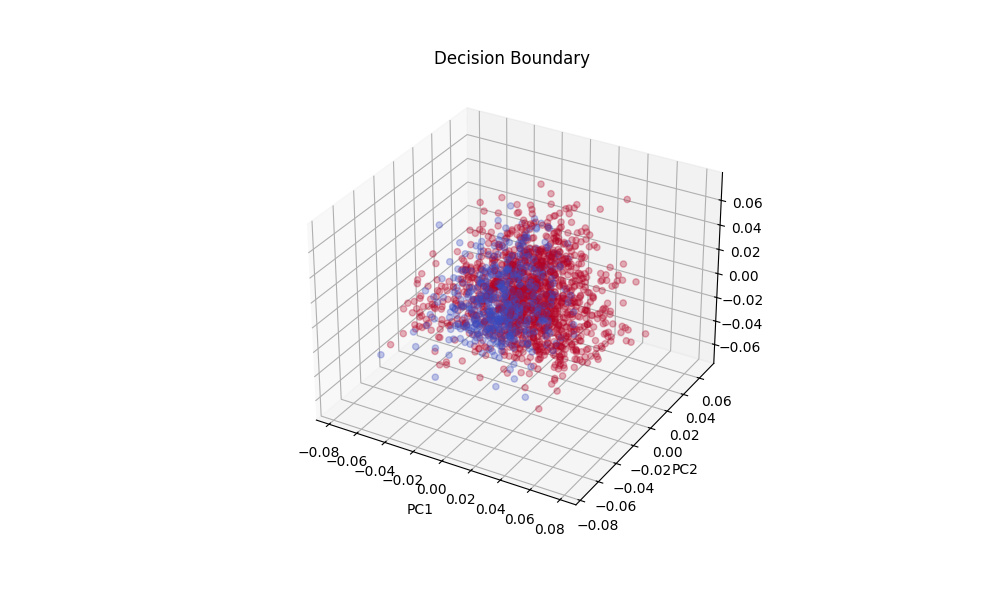

In [14]:
%matplotlib widget
from local_lib.plotting import plotClassesAlong3PCa
pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
pc_3 = X_test_pca_scaled[2, :]
plotClassesAlong3PCa(pc_1, pc_2,pc_3, y_test_simpler[0])

## **MaxAbs Scaler**

In [15]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import MaxAbsScaler

pipeline = Pipeline([
    ('MaxAbsScaler', MaxAbsScaler())])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.fit_transform(X_test)
X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)

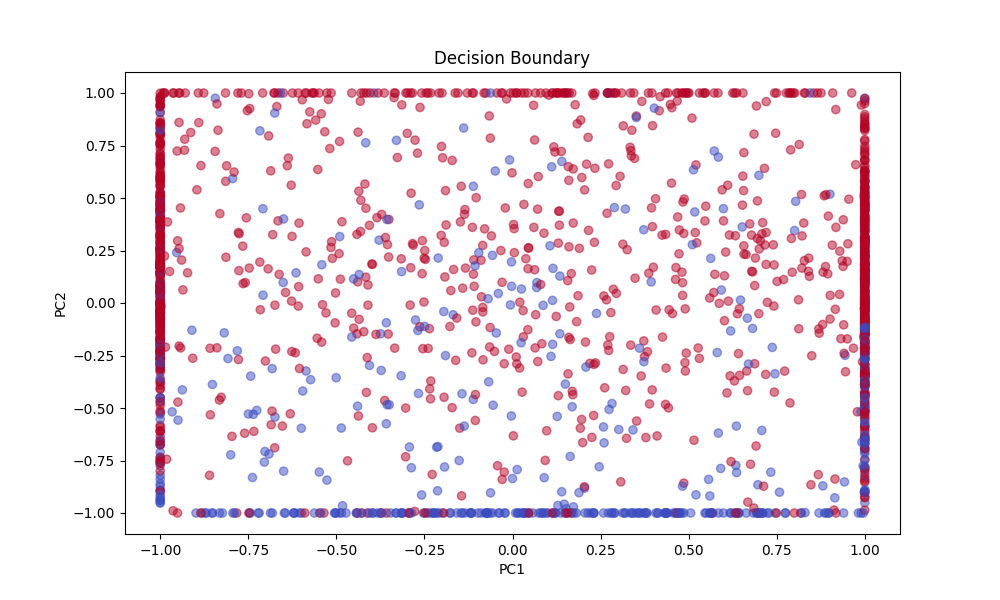

In [16]:
from local_lib.plotting import plotClassesAlong2PCa

pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
y_test_simpler[0]

plotClassesAlong2PCa(pc_1, pc_2, y_test_simpler[0])

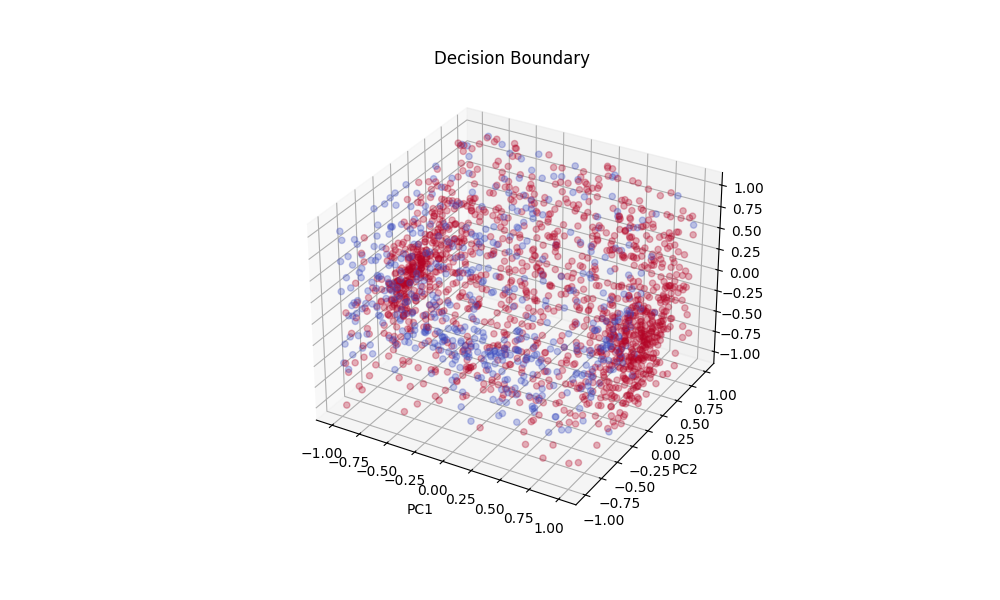

In [17]:
%matplotlib widget
from local_lib.plotting import plotClassesAlong3PCa
pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
pc_3 = X_test_pca_scaled[2, :]
plotClassesAlong3PCa(pc_1, pc_2,pc_3, y_test_simpler[0])

## **Standard Scaler**

In [18]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import StandardScaler

pipeline = Pipeline([
    ('StandardScaler', StandardScaler())])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.fit_transform(X_test)
X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)

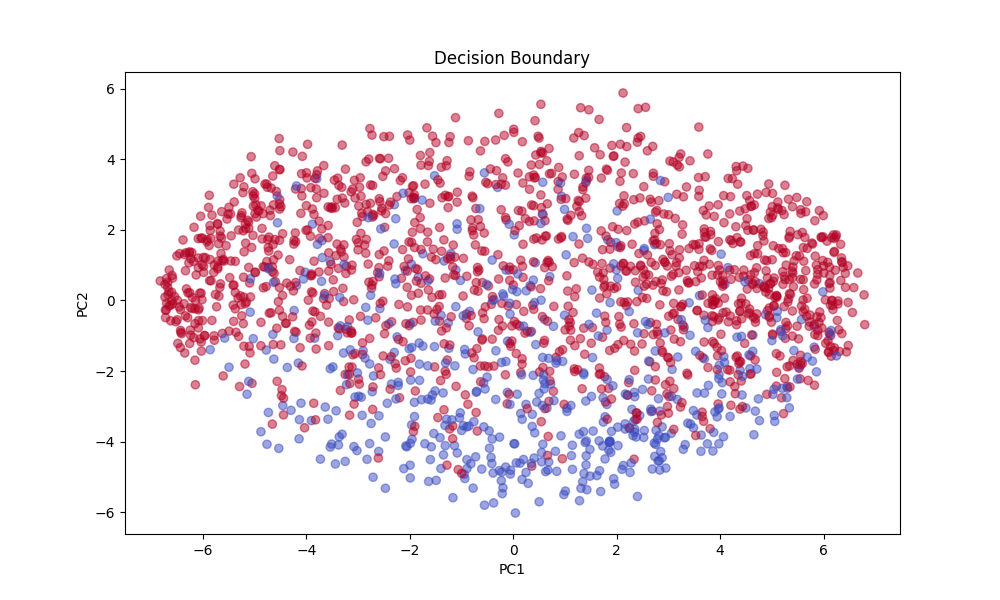

In [19]:
from local_lib.plotting import plotClassesAlong2PCa

pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
y_test_simpler[0]

plotClassesAlong2PCa(pc_1, pc_2, y_test_simpler[0])

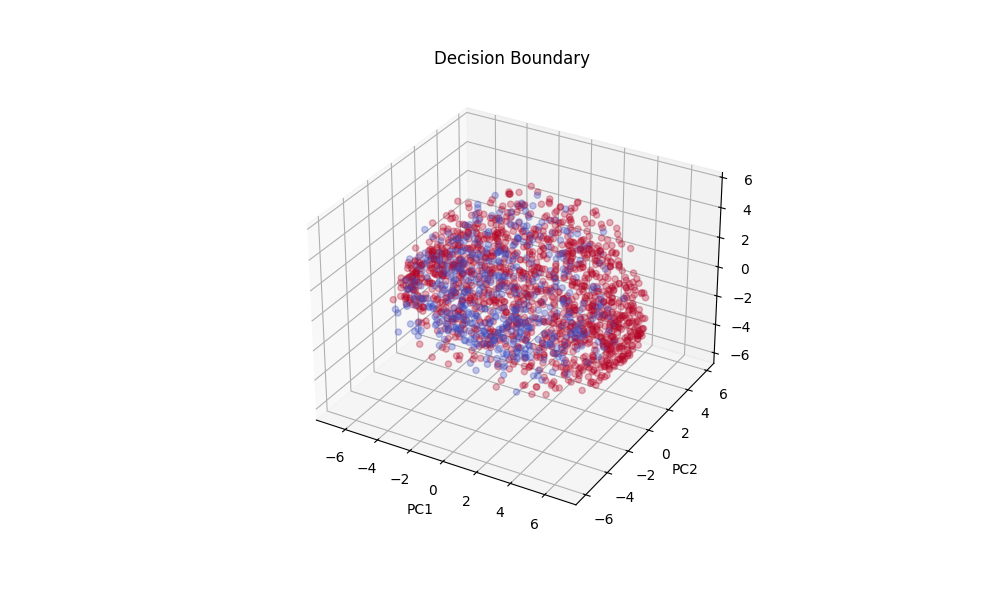

In [20]:
%matplotlib widget
from local_lib.plotting import plotClassesAlong3PCa
pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
pc_3 = X_test_pca_scaled[2, :]
plotClassesAlong3PCa(pc_1, pc_2,pc_3, y_test_simpler[0])

## **Robust Scaler**

In [21]:
from sklearn.pipeline import Pipeline
import numpy as np
from sklearn.preprocessing import RobustScaler

pipeline = Pipeline([
    ('RobustScaler', RobustScaler())])

X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.fit_transform(X_test)
X_train_pca_scaled = pipeline.fit_transform(X_train_pca)
X_test_pca_scaled = pipeline.fit_transform(X_test_pca)

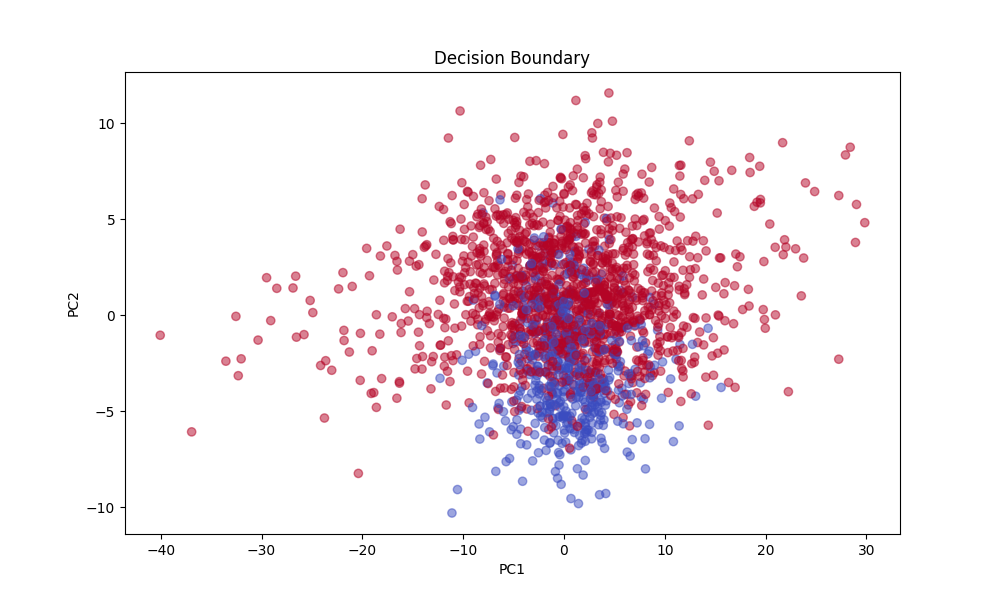

In [22]:
from local_lib.plotting import plotClassesAlong2PCa

pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
y_test_simpler[0]

plotClassesAlong2PCa(pc_1, pc_2, y_test_simpler[0])

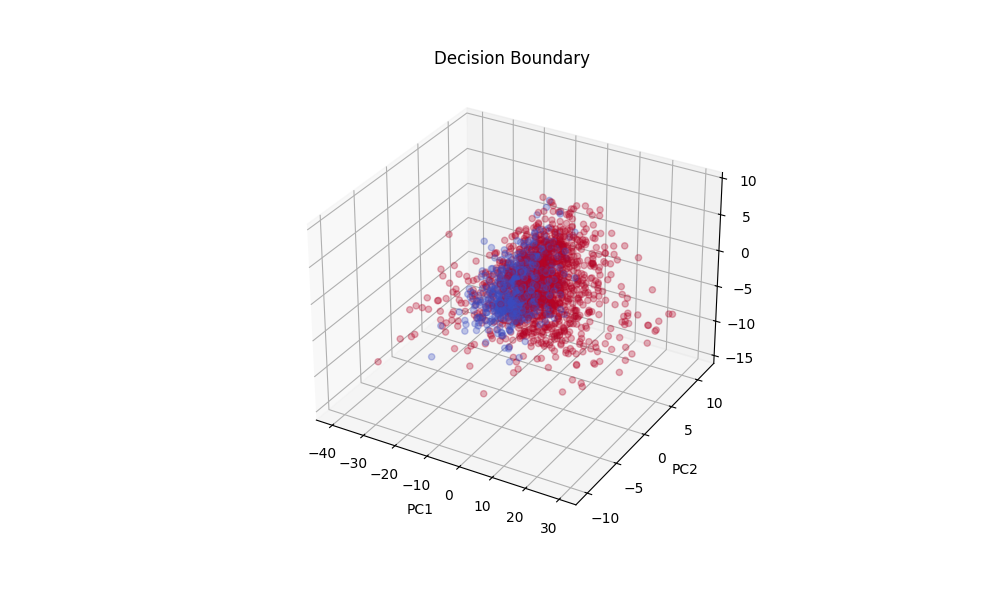

In [23]:
%matplotlib widget
from local_lib.plotting import plotClassesAlong3PCa
pc_1 = X_test_pca_scaled[0, :]
pc_2 = X_test_pca_scaled[1, :]
pc_3 = X_test_pca_scaled[2, :]
plotClassesAlong3PCa(pc_1, pc_2,pc_3, y_test_simpler[0])

## **Conclusion**
Some scaler seems to really help pulling appart classes from each other wich could be really helpful for training models